<a href="https://colab.research.google.com/github/Bagus780/PCVK-ganjil-2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.


 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 3


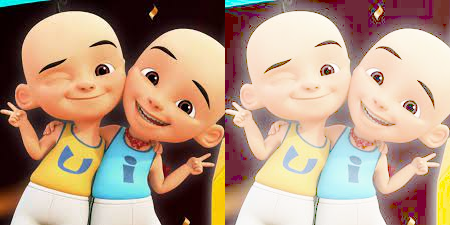

In [8]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


print(' Gamma Correction pada citra ')
print('-------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image/upin.jpg')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv2.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27
 = 128, dst.

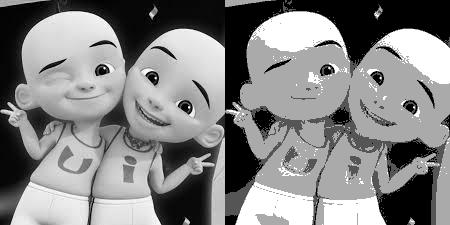

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

bit_depth = 2
bit = 2**bit_depth
level = 255 / (bit - 1)

original = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image/upin.jpg', cv2.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y, x] = np.clip(round(original[y, x] / level) * level, 0, 255);

final_frame = cv2.hconcat((original, depth_image))
cv2_imshow(final_frame)

3. Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

Average Denoising
----------------------------------
Masukkan nilai: 5
29.100725597702272


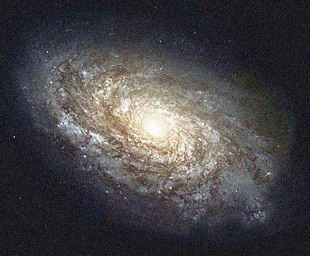

In [21]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob

print('Average Denoising')
print('----------------------------------')
try:
 photo_number = int(input('Masukkan nilai: '))
except ValueError:
 print('Error, not a number')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Colab Notebooks/noises/*.jpg'):
  n= cv2.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

Average Denoising
----------------------------------
Masukkan nilai: 30
28.919552790646065


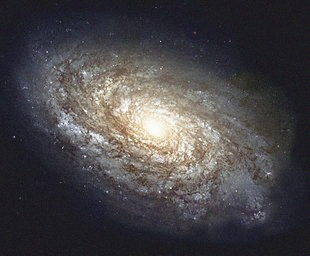

In [22]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob

print('Average Denoising')
print('----------------------------------')
try:
 photo_number = int(input('Masukkan nilai: '))
except ValueError:
 print('Error, not a number')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Colab Notebooks/noises/*.jpg'):
  n= cv2.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

Average Denoising
----------------------------------
Masukkan nilai: 60
28.89656772074272


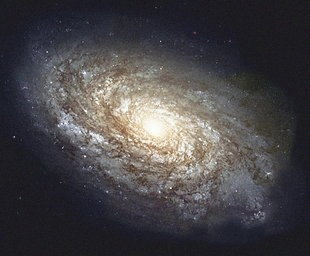

In [23]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob

print('Average Denoising')
print('----------------------------------')
try:
 photo_number = int(input('Masukkan nilai: '))
except ValueError:
 print('Error, not a number')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Colab Notebooks/noises/*.jpg'):
  n= cv2.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

Average Denoising
----------------------------------
Masukkan nilai: 80
28.900110868938235


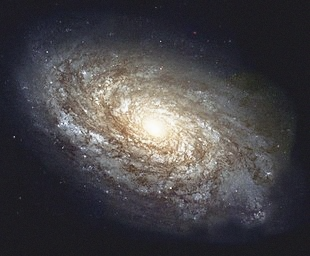

In [24]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob

print('Average Denoising')
print('----------------------------------')
try:
 photo_number = int(input('Masukkan nilai: '))
except ValueError:
 print('Error, not a number')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Colab Notebooks/noises/*.jpg'):
  n= cv2.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),

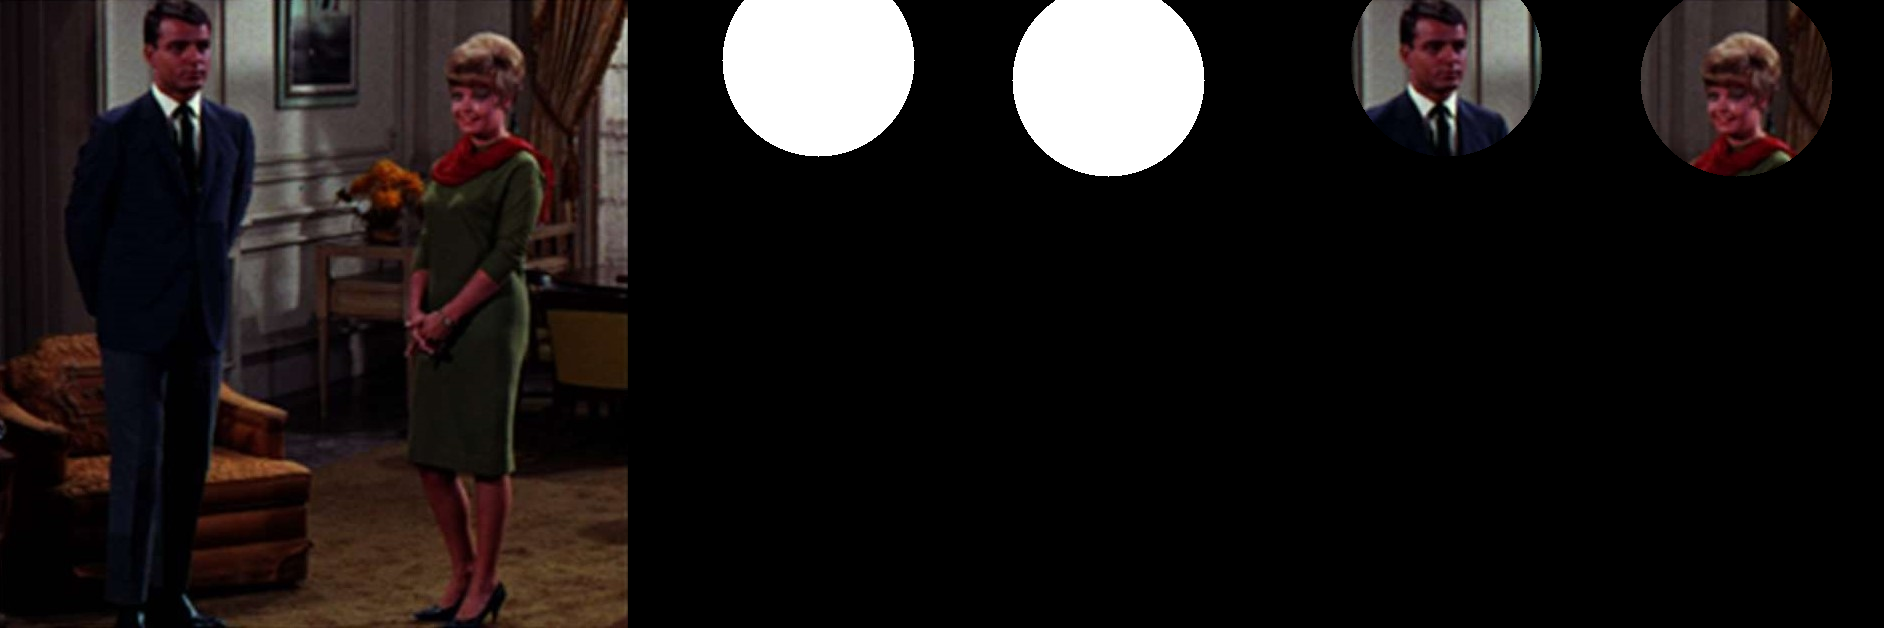

In [13]:
from google.colab.patches import cv2_imshow
image_path = '/content/drive/MyDrive/Colab Notebooks/Image/Cpl.jpg'
original_image = cv2.imread(image_path)

center1 = (190, 60)
radius1 = 96
center2 = (480, 80)
radius2 = 96

mask = np.zeros_like(original_image)
cv2.circle(mask, center1, radius1, (255, 255, 255), -1)
cv2.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv2.bitwise_and(original_image, mask)

final_frame = cv2.hconcat((original_image, mask,masked_image))
cv2_imshow(final_frame)


5. akukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.


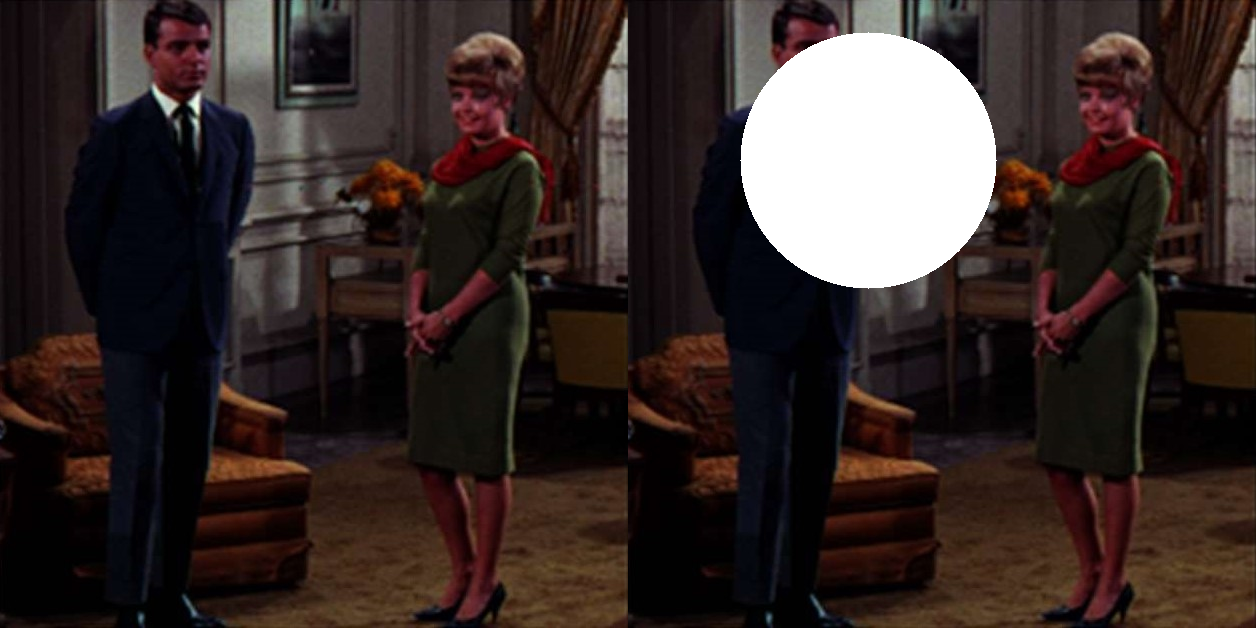

In [16]:
#OR
img_org = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image/Cpl.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv2.circle(mask, (240,160), 128, (255,255,255), -1)

result = img_org | mask

org_frame = cv2.hconcat((img_org, result))
cv2_imshow(org_frame)


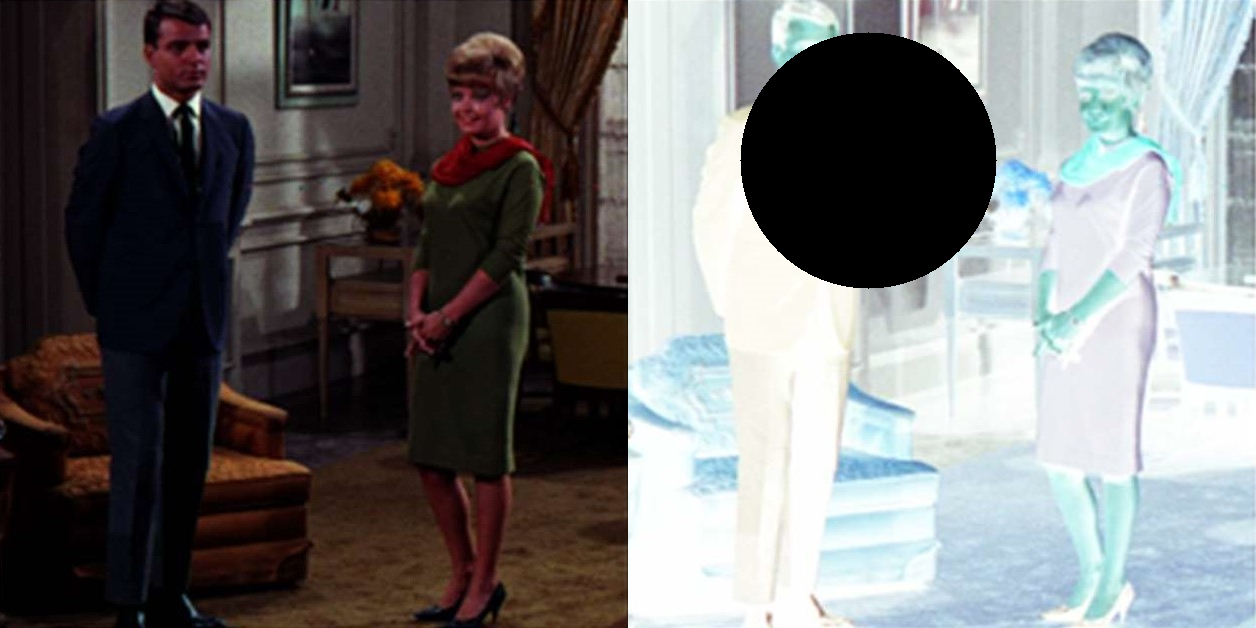

In [18]:
#NOT
img_org = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image/Cpl.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv2.circle(mask, (240,160), 128, (255,255,255), -1)

result = ~img_org & ~mask

org_frame = cv2.hconcat((img_org, result))
cv2_imshow(org_frame)

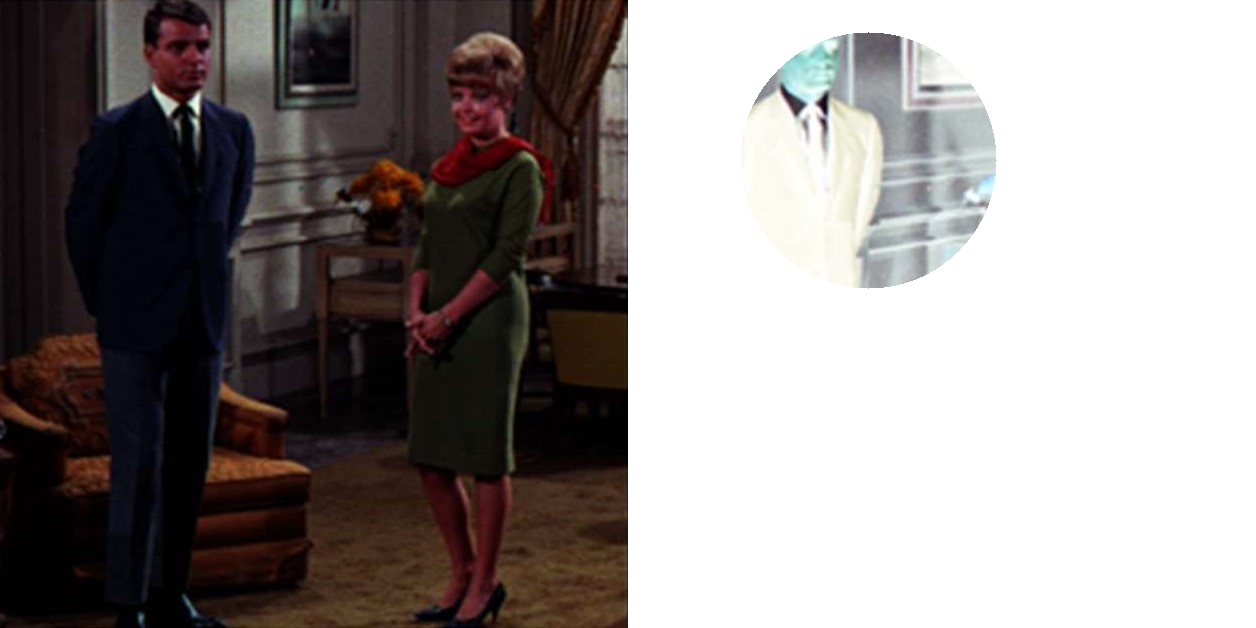

In [19]:
#NAND
img_org = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image/Cpl.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv2.circle(mask, (240,160), 128, (255,255,255), -1)

result = cv2.bitwise_not(cv2.bitwise_and(img_org, mask))

org_frame = cv2.hconcat((img_org, result))
cv2_imshow(org_frame)

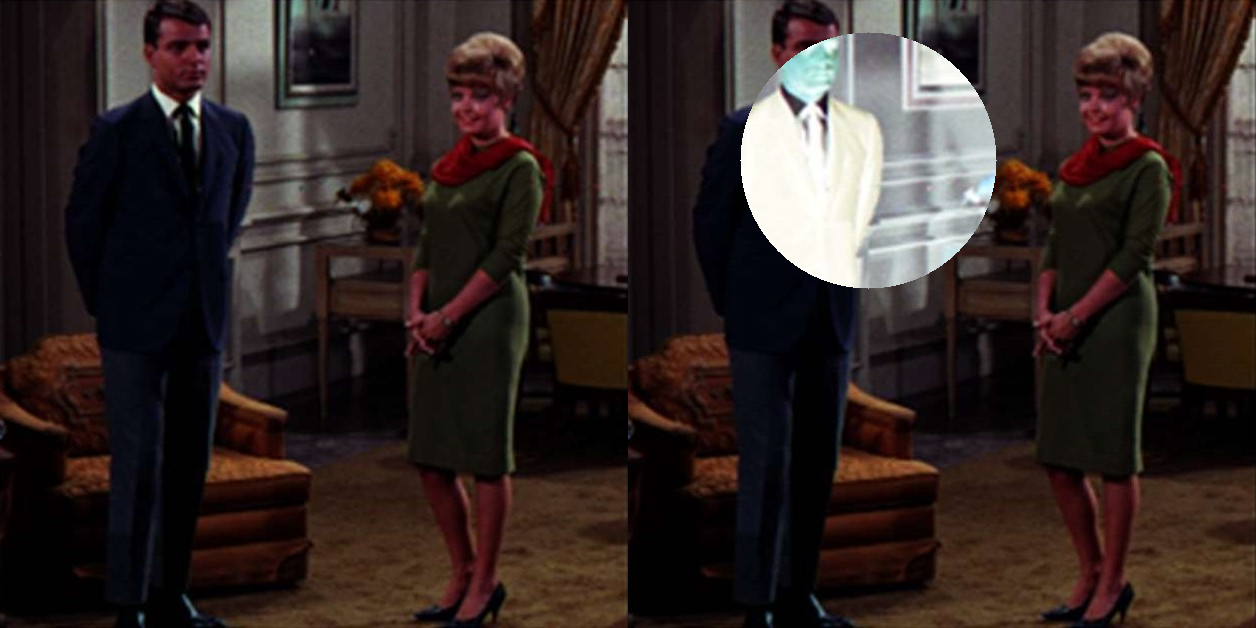

In [20]:
#XOR
img_org = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image/Cpl.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv2.circle(mask, (240,160), 128, (255,255,255), -1)

result = cv2.bitwise_xor(img_org, mask)

org_frame = cv2.hconcat((img_org, result))
cv2_imshow(org_frame)